Car Price Prediction using Machine Learning

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

Import Libraries and Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()
cars.describe()
pd.set_option('display.float_format',lambda x: '%.3f'%x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()
pd.set_option('display.max_columns',500)
cars.describe()


,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


Data Cleaning – Drop Irrelevant Columns and Duplicates

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()
col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col,axis=1)
cars.drop_duplicates(keep='first',inplace=True)
cars.isnull().sum()

,0
seller,0
offerType,0
price,0
abtest,0
vehicleType,5152
yearOfRegistration,0
gearbox,2765
powerPS,0
model,2730
kilometer,0


EDA ANALYSIS

<Axes: xlabel='yearOfRegistration', ylabel='price'>

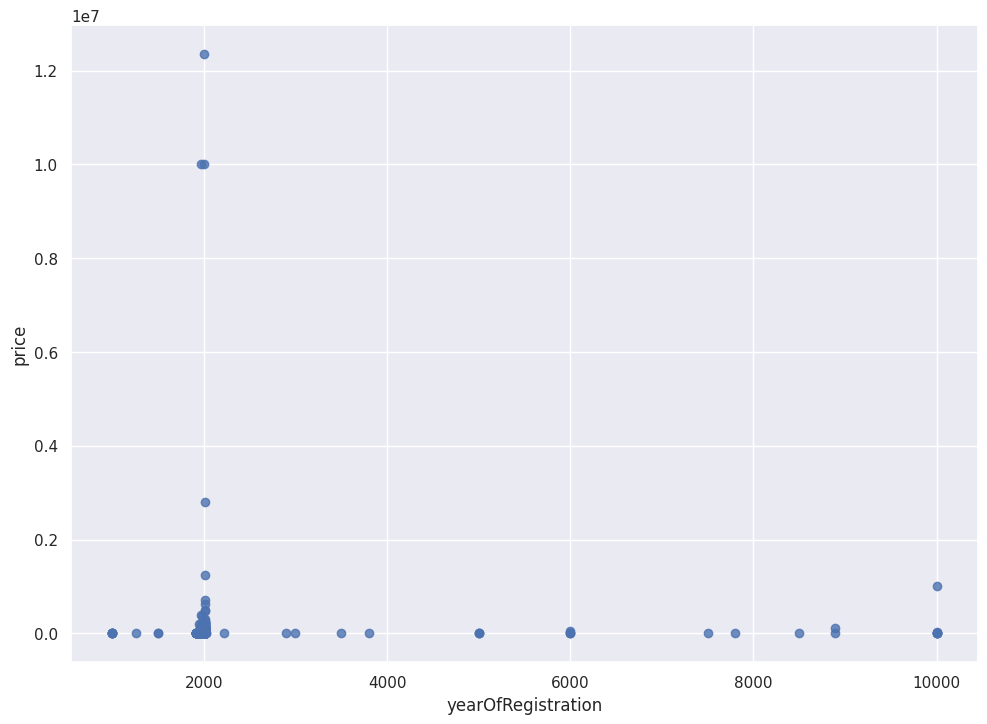

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()
col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col,axis=1)
cars.drop_duplicates(keep='first',inplace=True)
cars.isnull().sum()
yearwise_counts = cars['yearOfRegistration'].value_counts().sort_index()
sum(cars['yearOfRegistration'] > 2018)
sum(cars['yearOfRegistration'] < 1950) # range is 1950 to 2018
sns.regplot(x='yearOfRegistration',y='price',scatter=True,fit_reg=False,data=cars)

1748

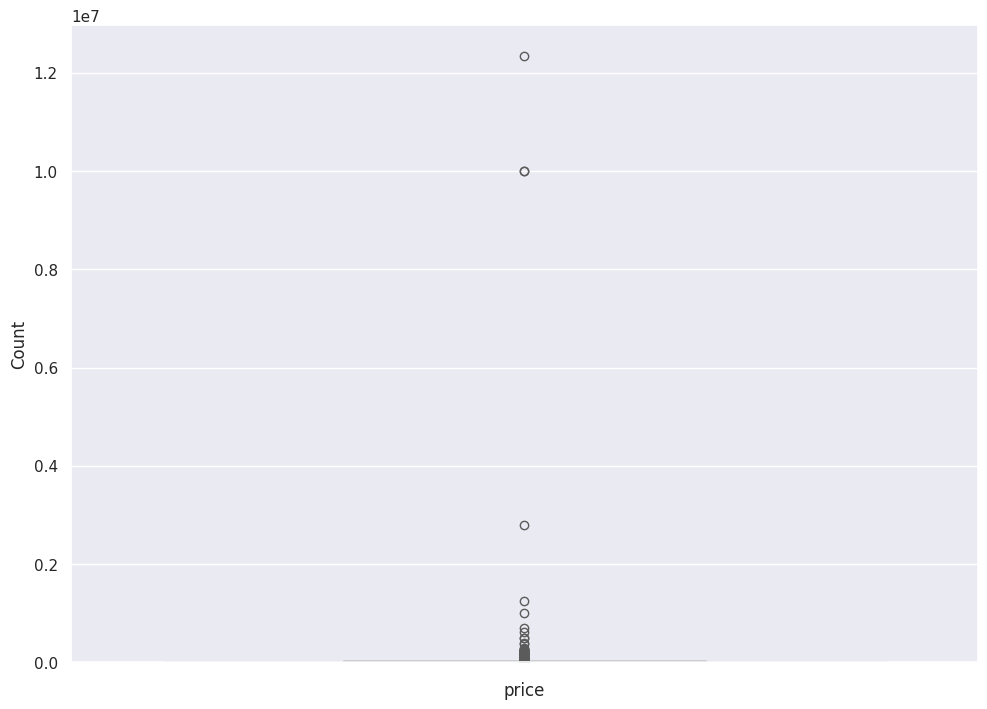

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()
col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col,axis=1)
cars.drop_duplicates(keep='first',inplace=True)
cars.isnull().sum()

price_count = cars['price'].value_counts().sort_index()
sns.histplot(cars['price'])
cars['price'].describe()
sns.boxplot(y=cars['price'])
sum(cars['price'] >150000)
sum(cars['price'] < 100)

# working rane 100 to 150000

Explore and Clean 'powerPS' Feature

<Axes: xlabel='powerPS', ylabel='Count'>

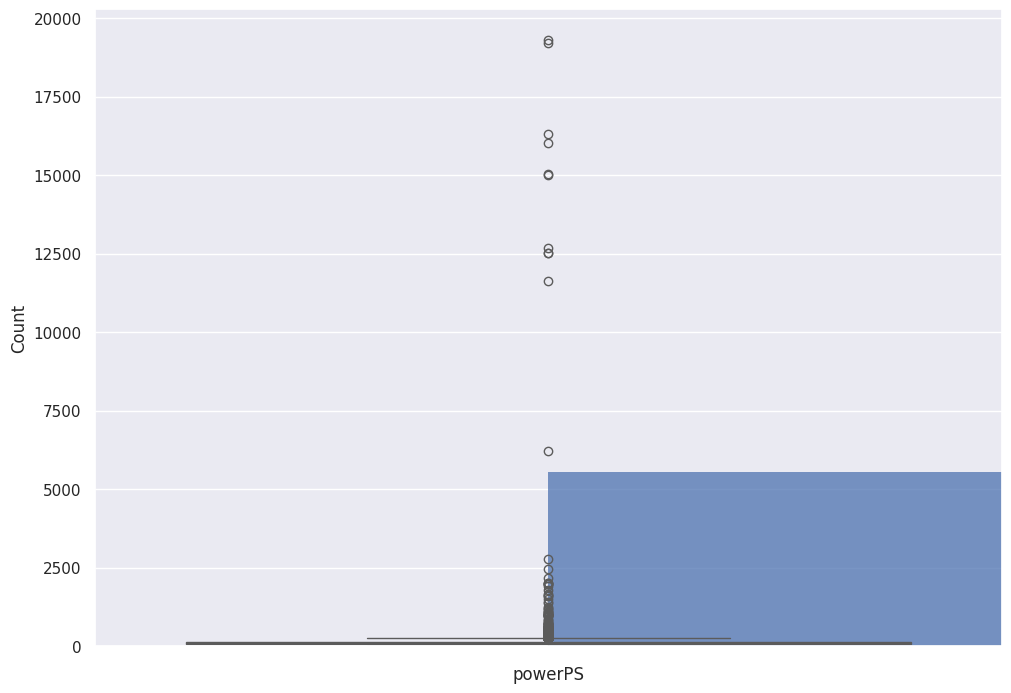

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()
col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col,axis=1)
cars.drop_duplicates(keep='first',inplace=True)
cars.isnull().sum

price_count = cars['powerPS'].value_counts().sort_index()
sns.histplot(cars['powerPS'])
cars['powerPS'].describe()
sns.boxplot(y=cars['powerPS'])



,powerPS
count,49531.000000
mean,116.500515
std,231.535603
min,0.000000
25%,69.000000
50%,105.000000
75%,150.000000
max,19312.000000


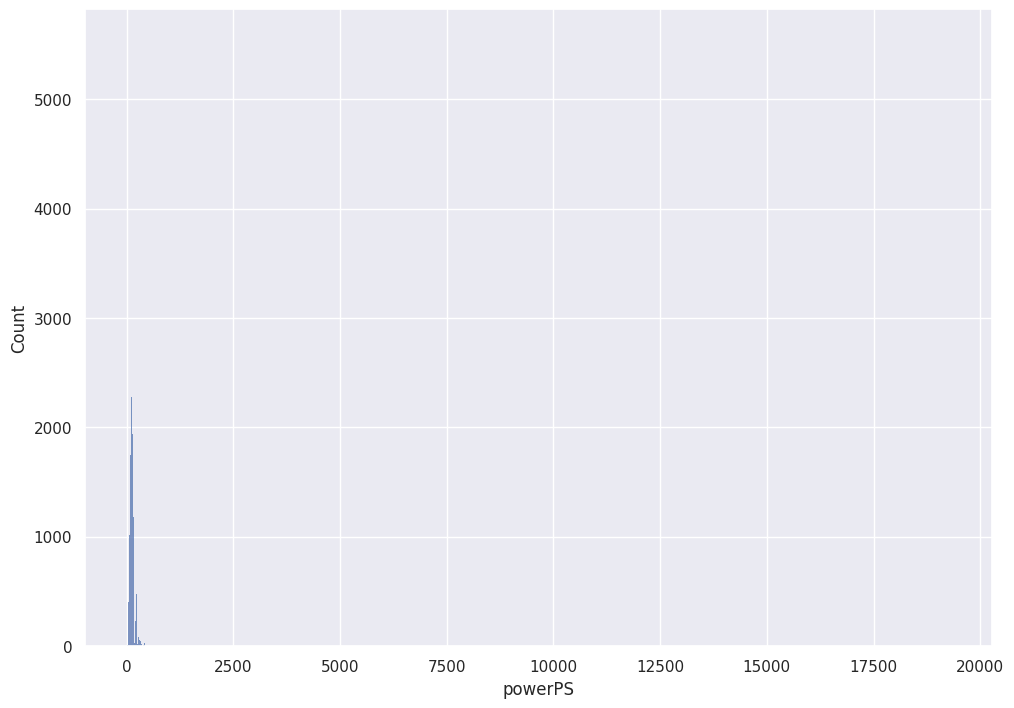

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()
col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col,axis=1)
cars.drop_duplicates(keep='first',inplace=True)
cars.isnull().sum

price_count = cars['powerPS'].value_counts().sort_index()
sns.histplot(cars['powerPS'])
cars['powerPS'].describe() #like this see for every variable

Outlier Detection and Power Analysis

5565

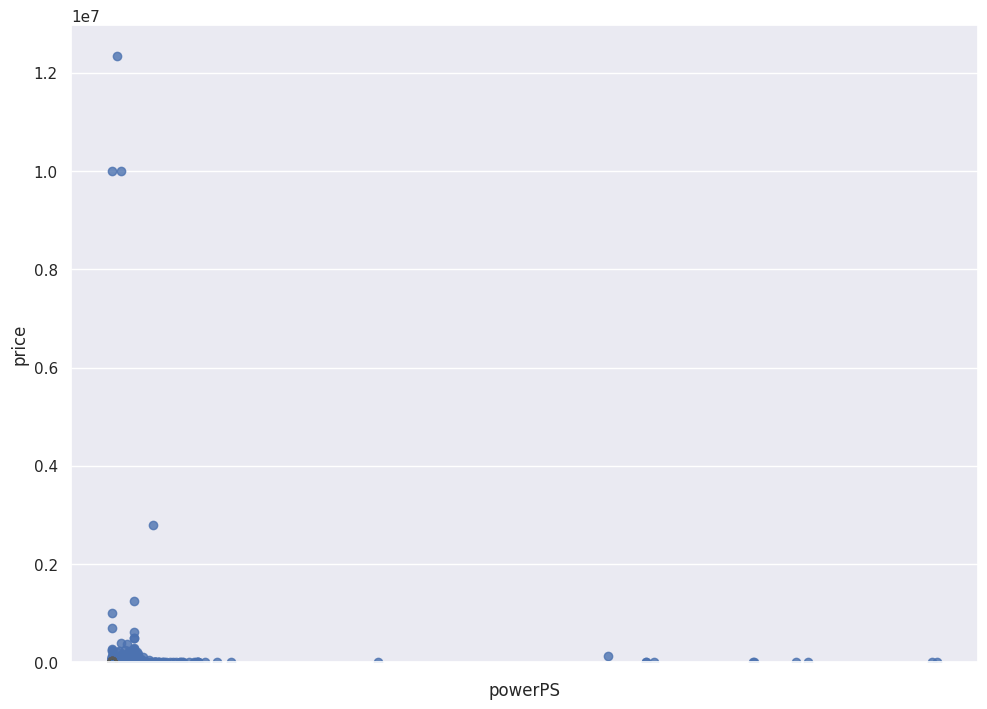

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()
col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col,axis=1)
cars.drop_duplicates(keep='first',inplace=True)
cars.isnull().sum

price_count = cars['powerPS'].value_counts().sort_index()
sns.histplot(cars['powerPS'])
cars['powerPS'].describe()
sns.boxplot(y=cars['powerPS'])
sns.regplot(x='powerPS',y='price',scatter=True,fit_reg=False,data=cars)
sum(cars['powerPS'] > 500)
sum(cars['powerPS'] < 10) #working data b/w 10 to 500

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cars_sampled.csv to cars_sampled.csv


Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage', 'Age'],
      dtype='object')


<Axes: xlabel='Age', ylabel='Count'>

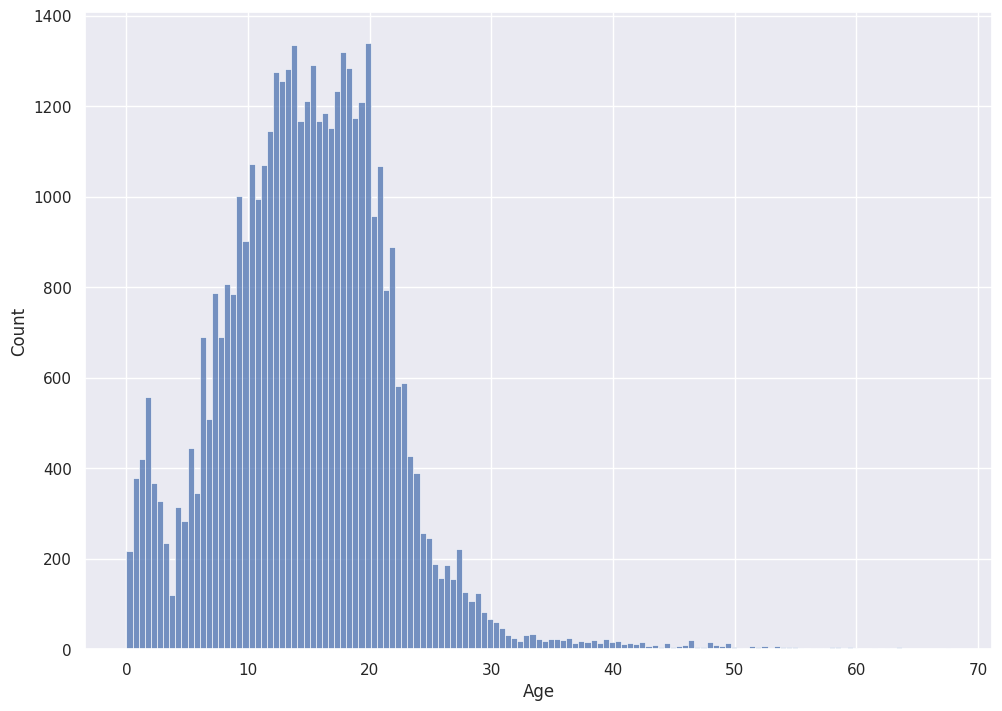

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()

col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col, axis=1)

# Remove duplicate entries
cars.drop_duplicates(keep='first', inplace=True)

cars = cars[
    (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]

cars['monthOfRegistration'] = cars['monthOfRegistration'].astype(float)

cars.loc[:, 'monthOfRegistration'] = cars['monthOfRegistration'] / 12
cars.loc[:, 'Age'] = (2018 - cars['yearOfRegistration']) + cars['monthOfRegistration']
cars.loc[:, 'Age'] = cars['Age'].round(2)
cars = cars.drop(columns=['yearOfRegistration', 'monthOfRegistration'], axis=1)
print(cars.columns)
#visualize
sns.histplot(cars['Age'])


Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage', 'Age'],
      dtype='object')


<Axes: ylabel='Age'>

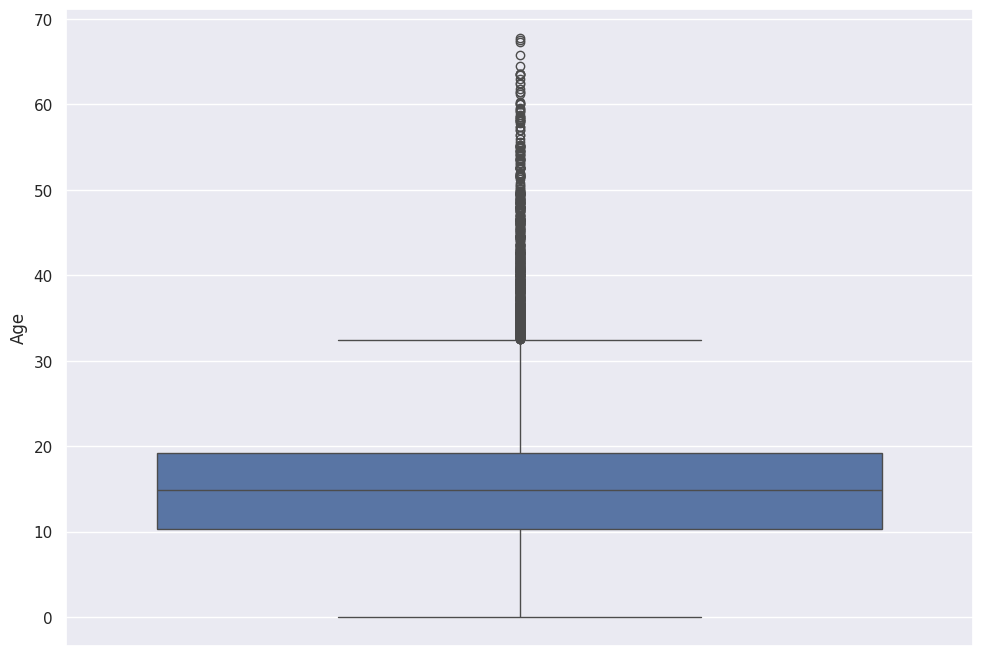

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()

col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col, axis=1)

# Remove duplicate entries
cars.drop_duplicates(keep='first', inplace=True)

cars = cars[
    (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]

cars['monthOfRegistration'] = cars['monthOfRegistration'].astype(float)

cars.loc[:, 'monthOfRegistration'] = cars['monthOfRegistration'] / 12
cars.loc[:, 'Age'] = (2018 - cars['yearOfRegistration']) + cars['monthOfRegistration']
cars.loc[:, 'Age'] = cars['Age'].round(2)
cars = cars.drop(columns=['yearOfRegistration', 'monthOfRegistration'], axis=1)
print(cars.columns)
#visualize
sns.boxplot(cars['Age'])

Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage', 'Age'],
      dtype='object')


<Axes: ylabel='price'>

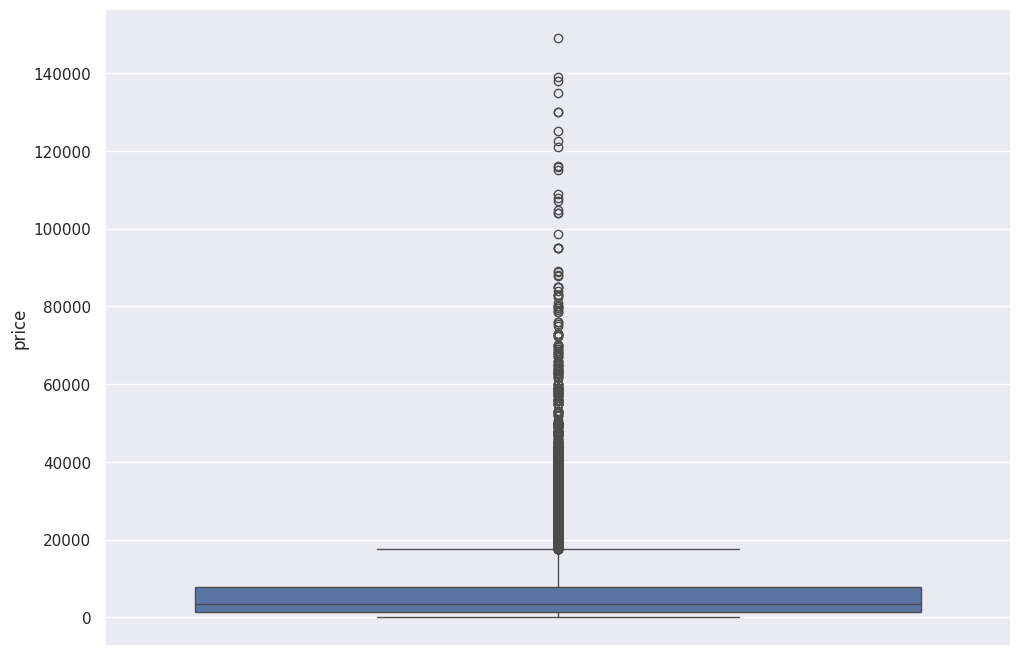

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()

col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col, axis=1)

# Remove duplicate entries
cars.drop_duplicates(keep='first', inplace=True)

cars = cars[
    (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]
cars = cars.copy()

# Now convert 'monthOfRegistration' to float
cars['monthOfRegistration'] = cars['monthOfRegistration'].astype(float)

# Perform the division
cars['monthOfRegistration'] = cars['monthOfRegistration'] / 12
cars.loc[:, 'Age'] = (2018 - cars['yearOfRegistration']) + cars['monthOfRegistration']
cars.loc[:, 'Age'] = cars['Age'].round(2)
cars = cars.drop(columns=['yearOfRegistration', 'monthOfRegistration'], axis=1)
print(cars.columns)
#visualize
sns.boxplot(cars['price'])

Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage', 'Age'],
      dtype='object')


<Axes: xlabel='price', ylabel='Count'>

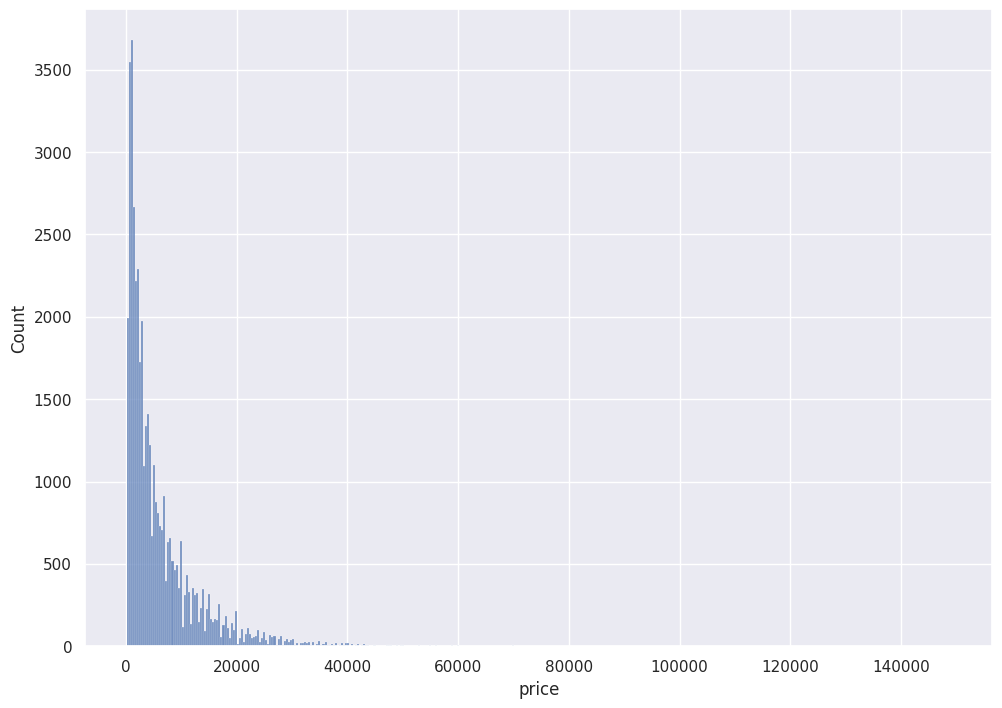

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()

col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col, axis=1)

# Remove duplicate entries
cars.drop_duplicates(keep='first', inplace=True)

cars = cars[
    (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]

cars['monthOfRegistration'] = cars['monthOfRegistration'].astype(float)

cars.loc[:, 'monthOfRegistration'] = cars['monthOfRegistration'] / 12
cars.loc[:, 'Age'] = (2018 - cars['yearOfRegistration']) + cars['monthOfRegistration']
cars.loc[:, 'Age'] = cars['Age'].round(2)
cars = cars.drop(columns=['yearOfRegistration', 'monthOfRegistration'], axis=1)
print(cars.columns)
#visualize
sns.histplot(cars['price'])


data filtering, feature engineering, and relationship visualization 

Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage', 'Age'],
      dtype='object')


<Axes: xlabel='Age', ylabel='price'>

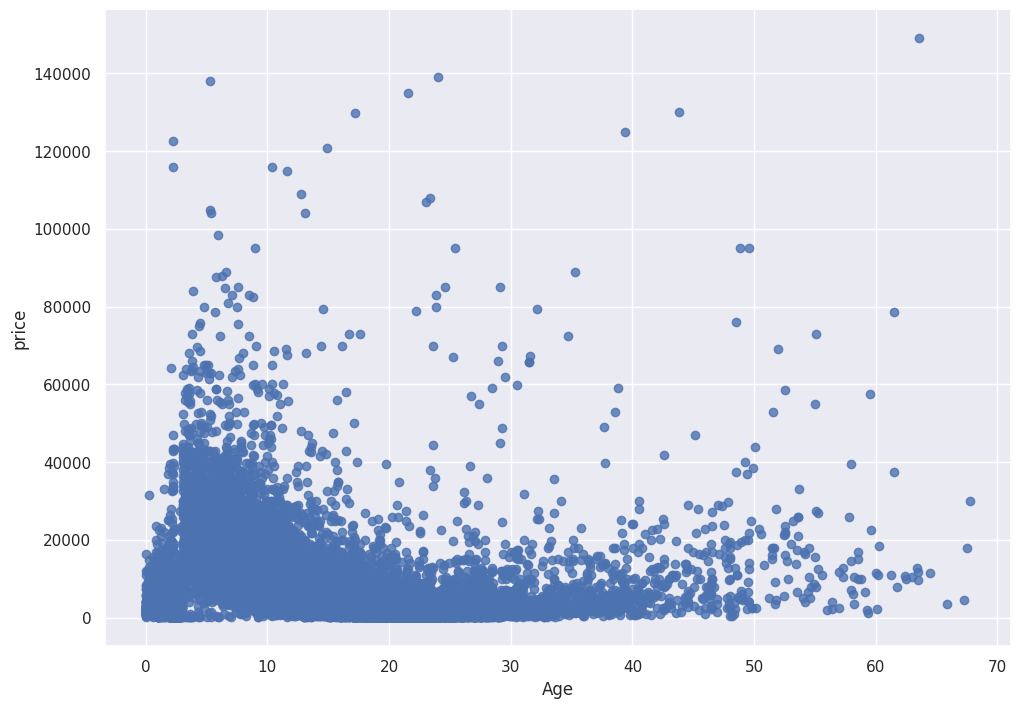

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()

col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col, axis=1)

# Remove duplicate entries
cars.drop_duplicates(keep='first', inplace=True)

cars = cars[
    (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]
cars = cars.copy()

# Now convert 'monthOfRegistration' to float
cars['monthOfRegistration'] = cars['monthOfRegistration'].astype(float)

# Perform the division
cars['monthOfRegistration'] = cars['monthOfRegistration'] / 12
cars.loc[:, 'Age'] = (2018 - cars['yearOfRegistration']) + cars['monthOfRegistration']
cars.loc[:, 'Age'] = cars['Age'].round(2)
cars = cars.drop(columns=['yearOfRegistration', 'monthOfRegistration'], axis=1)
print(cars.columns)
#visualize
sns.regplot(x='Age',y='price',scatter=True,fit_reg=False,data=cars)
#sns.histplot(cars['powerPS'])
# as age increase price decreases

Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage', 'Age'],
      dtype='object')


<Axes: xlabel='powerPS', ylabel='price'>

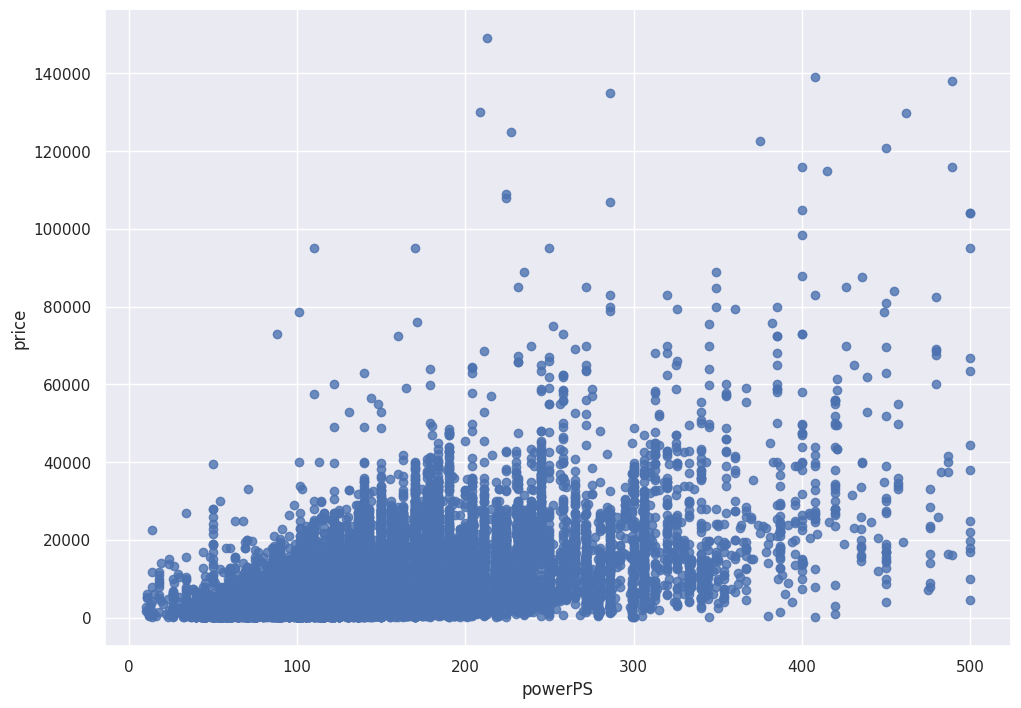

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()

col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col, axis=1)

# Remove duplicate entries
cars.drop_duplicates(keep='first', inplace=True)

cars = cars[
    (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]
cars = cars.copy()

# Now convert 'monthOfRegistration' to float
cars['monthOfRegistration'] = cars['monthOfRegistration'].astype(float)

# Perform the division
cars['monthOfRegistration'] = cars['monthOfRegistration'] / 12
cars.loc[:, 'Age'] = (2018 - cars['yearOfRegistration']) + cars['monthOfRegistration']
cars.loc[:, 'Age'] = cars['Age'].round(2)
cars = cars.drop(columns=['yearOfRegistration', 'monthOfRegistration'], axis=1)
print(cars.columns)
#visualize
sns.regplot(x='powerPS',y='price',scatter=True,fit_reg=False,data=cars)

# powerPS vs price with increase in powerPS price also increase


Analyze Categorical Feature – 'seller'

<Axes: xlabel='seller', ylabel='count'>

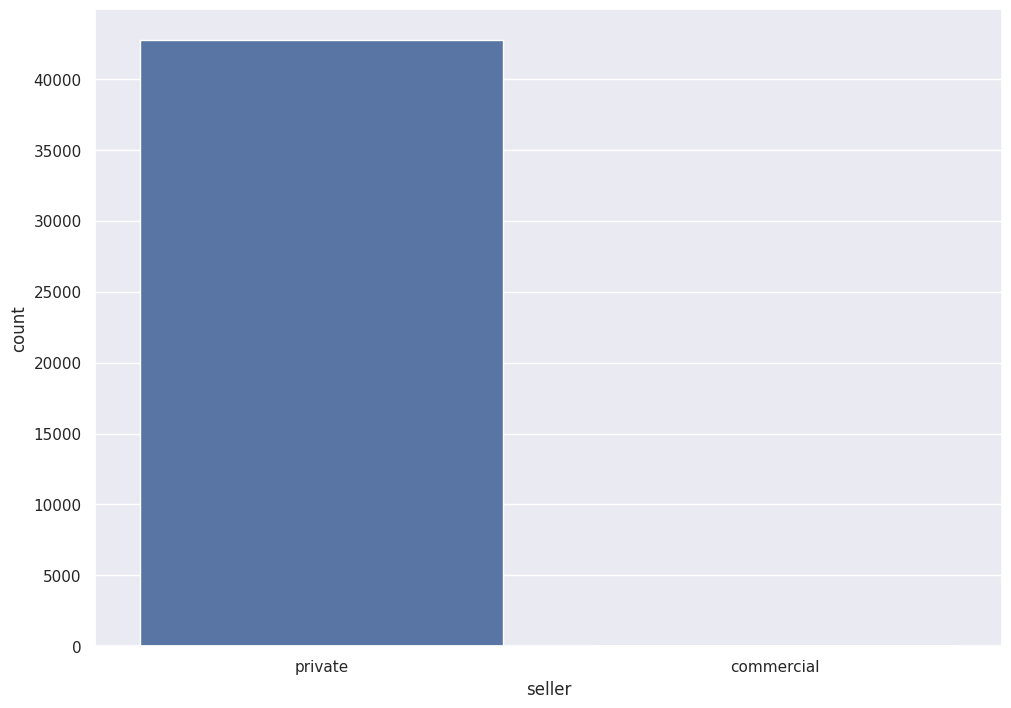

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()

col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col, axis=1)

# Remove duplicate entries
cars.drop_duplicates(keep='first', inplace=True)

cars = cars[
    (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]
cars = cars.copy()
cars['seller'].value_counts()
pd.crosstab(cars['seller'],columns = 'count',normalize=True)
sns.countplot(x='seller',data=cars)

<Axes: xlabel='abtest', ylabel='count'>

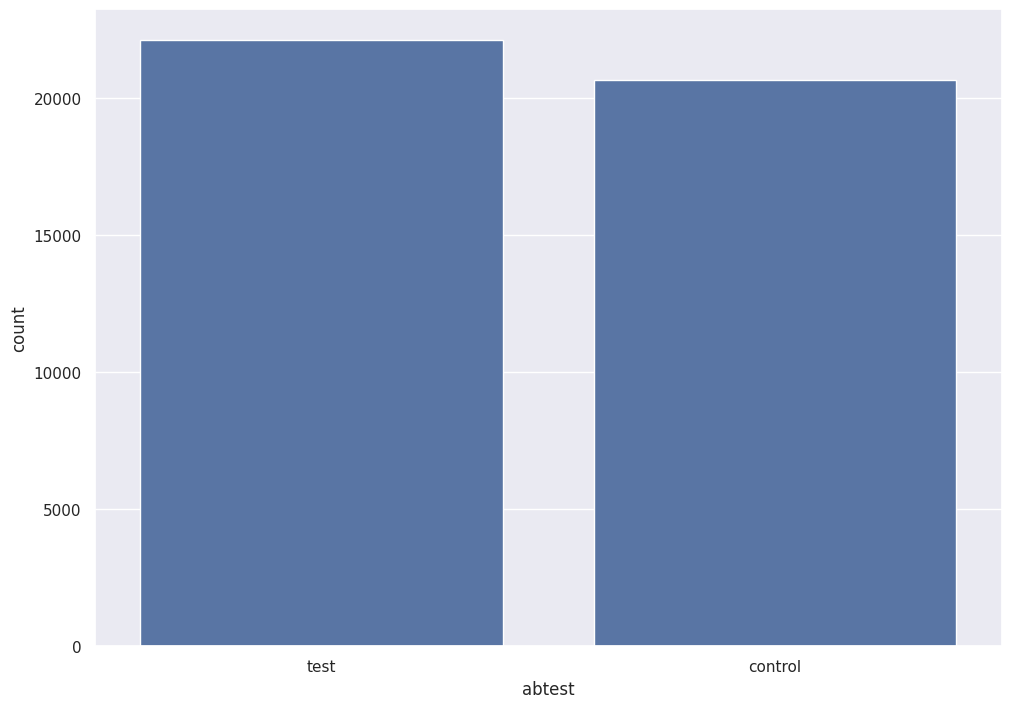

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()

col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col, axis=1)

# Remove duplicate entries
cars.drop_duplicates(keep='first', inplace=True)

cars = cars[
    (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]
cars = cars.copy()
cars['abtest'].value_counts()
pd.crosstab(cars['abtest'],columns='count',normalize=True)
sns.countplot(x='abtest',data=cars)

Visualize Categorical Feature – 'abtest'

<Axes: xlabel='abtest', ylabel='price'>

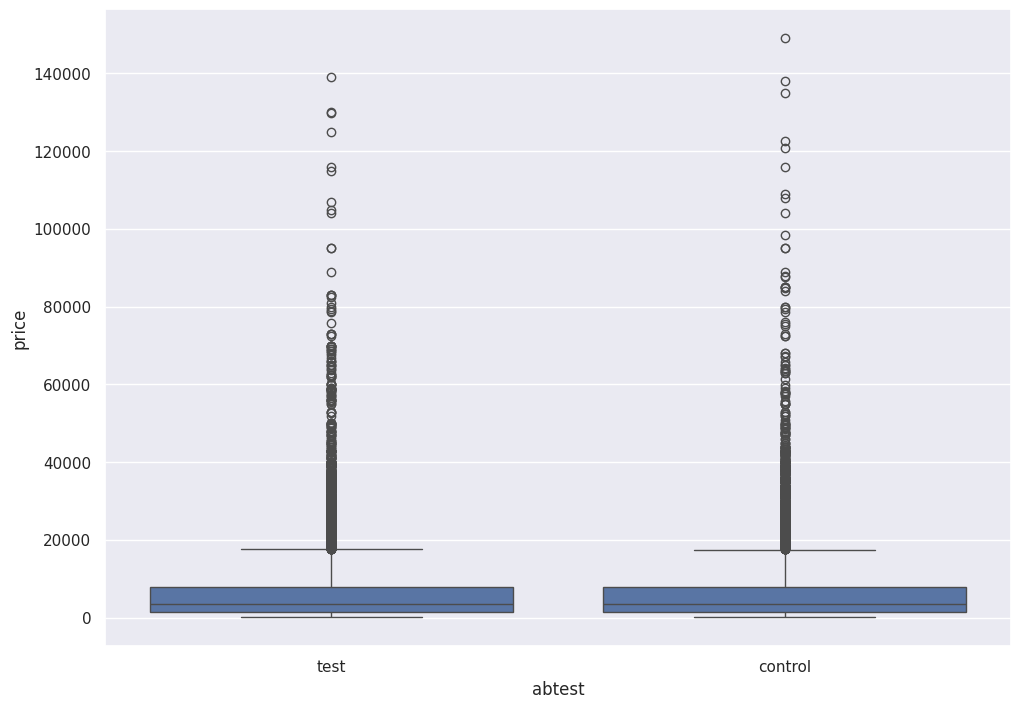

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()

col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col, axis=1)

# Remove duplicate entries
cars.drop_duplicates(keep='first', inplace=True)

cars = cars[
    (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]
cars = cars.copy()

sns.boxplot(x='abtest',y='price',data=cars)
# 50-50 distribution
#We explore the feature **`abtest`**, which indicates whether the car listing was part of an A/B test

<Axes: xlabel='vehicleType', ylabel='count'>

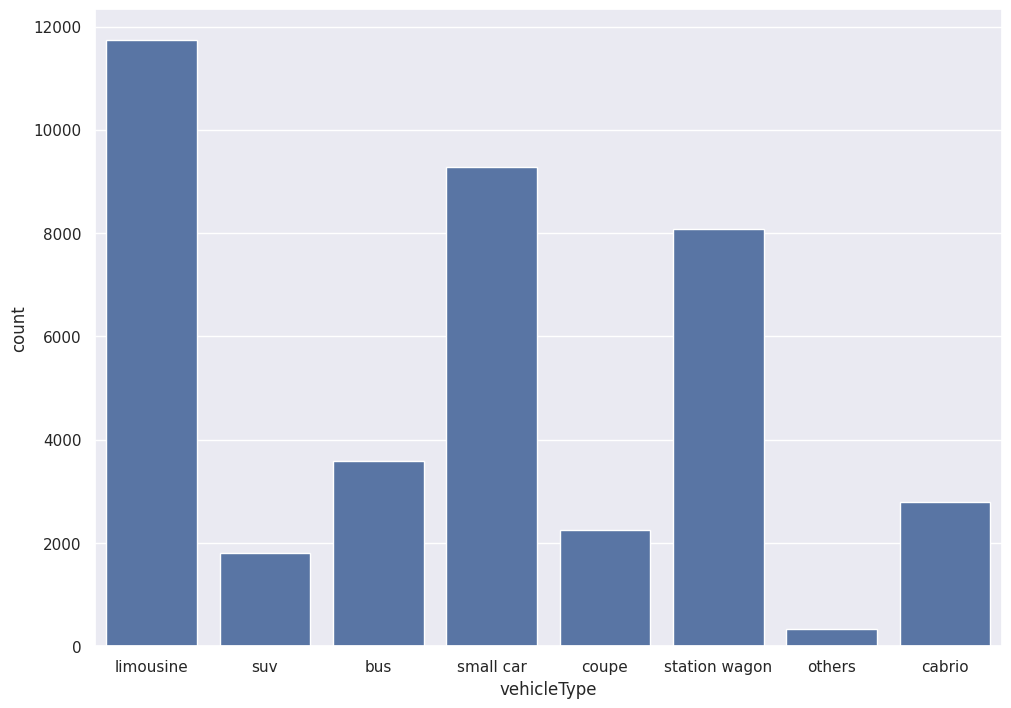

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()

col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col, axis=1)

# Remove duplicate entries
cars.drop_duplicates(keep='first', inplace=True)

cars = cars[
    (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]
cars = cars.copy()

cars['vehicleType'].value_counts()
pd.crosstab(cars['vehicleType'],columns='count',normalize=True)
sns.countplot(x='vehicleType',data=cars)


<Axes: xlabel='vehicleType', ylabel='price'>

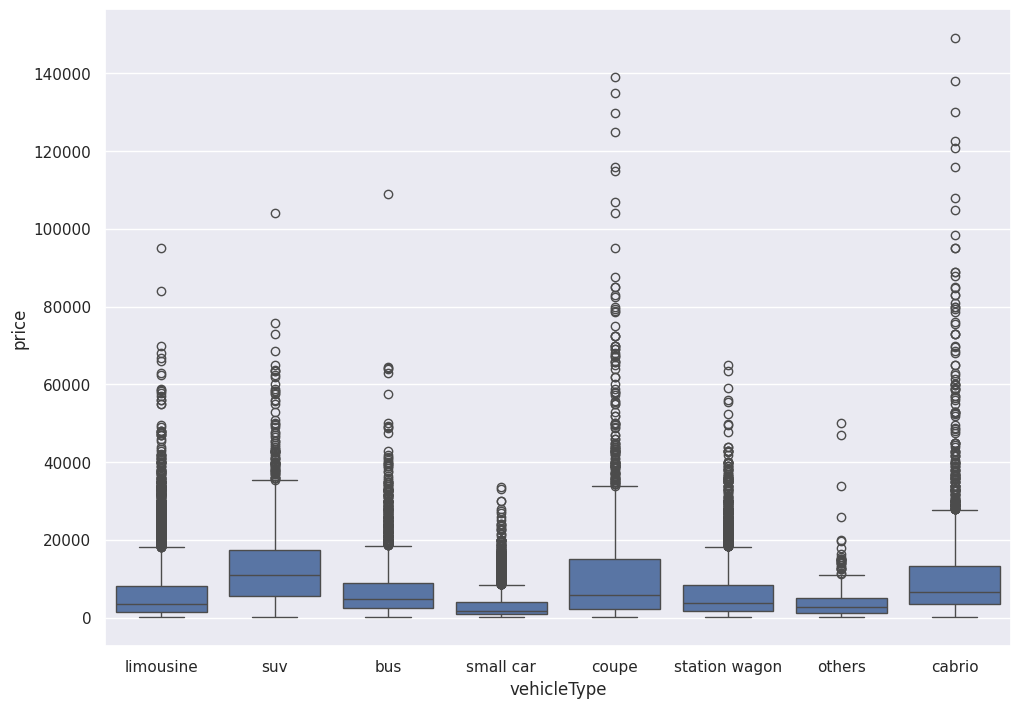

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()

col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col, axis=1)

# Remove duplicate entries
cars.drop_duplicates(keep='first', inplace=True)

cars = cars[
    (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]
cars = cars.copy()

cars['vehicleType'].value_counts()
pd.crosstab(cars['vehicleType'],columns='count',normalize=True)
sns.boxplot(x='vehicleType',y='price',data=cars)


<Axes: xlabel='gearbox', ylabel='count'>

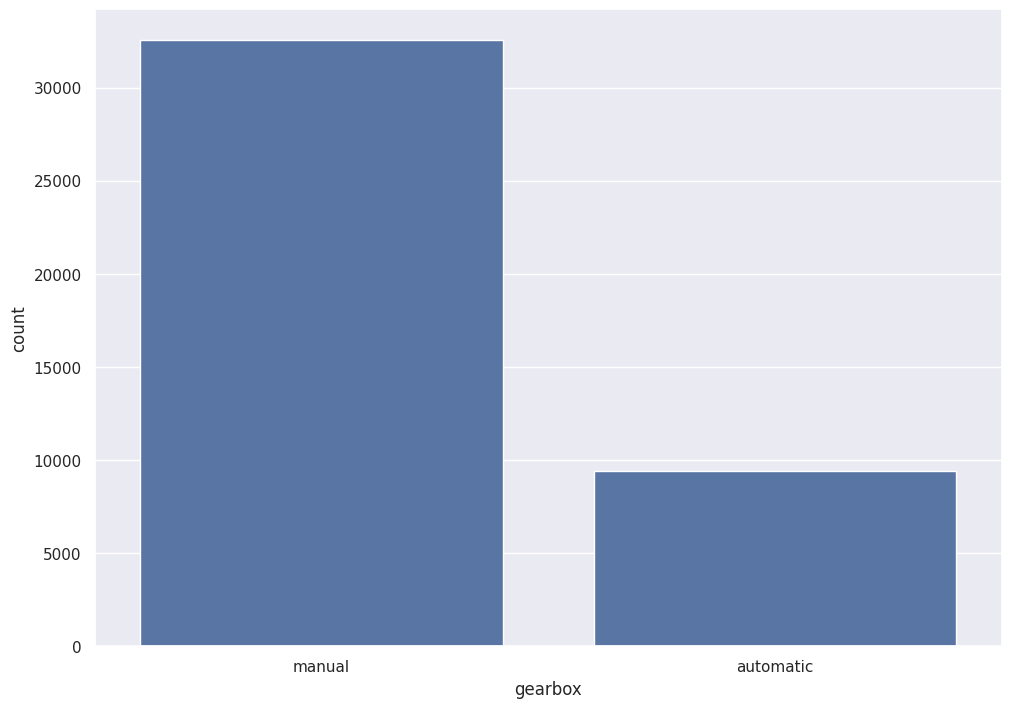

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()

col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col, axis=1)

# Remove duplicate entries
cars.drop_duplicates(keep='first', inplace=True)

cars = cars[
    (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]
cars = cars.copy()
cars['gearbox'].value_counts()
pd.crosstab(cars['gearbox'],columns='count',normalize=True)
sns.countplot(x='gearbox',data=cars)


<Axes: xlabel='gearbox', ylabel='price'>

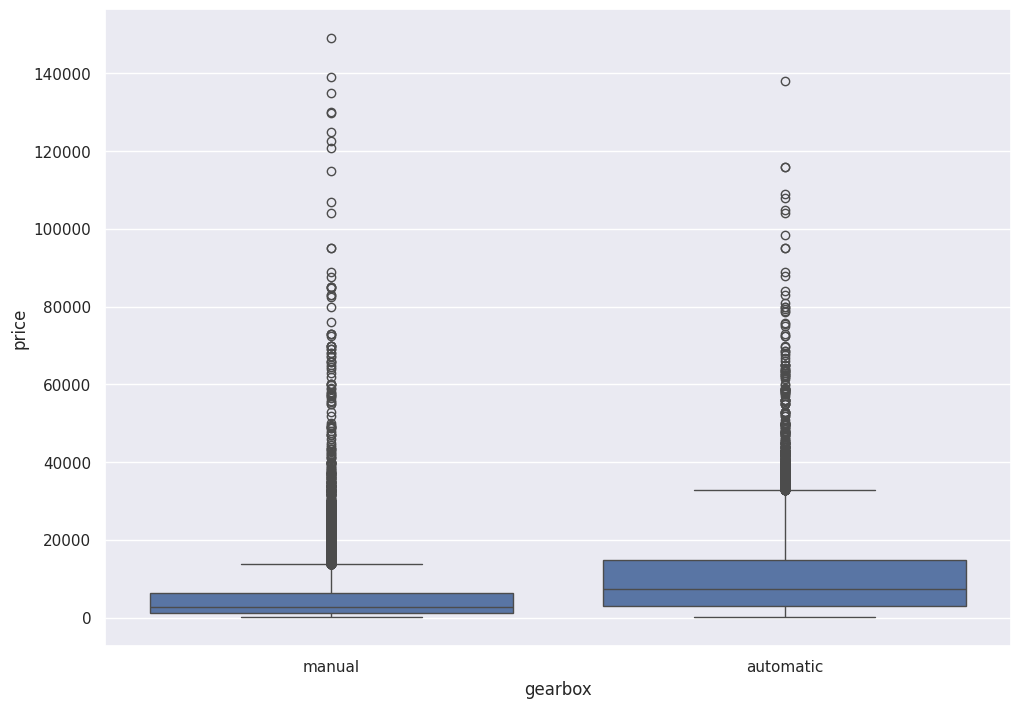

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()

col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col, axis=1)

# Remove duplicate entries
cars.drop_duplicates(keep='first', inplace=True)

cars = cars[
    (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]
cars = cars.copy()
cars['gearbox'].value_counts()
pd.crosstab(cars['gearbox'],columns='count',normalize=True)
sns.boxplot(x='gearbox',y='price',data=cars)

<Axes: xlabel='model', ylabel='price'>

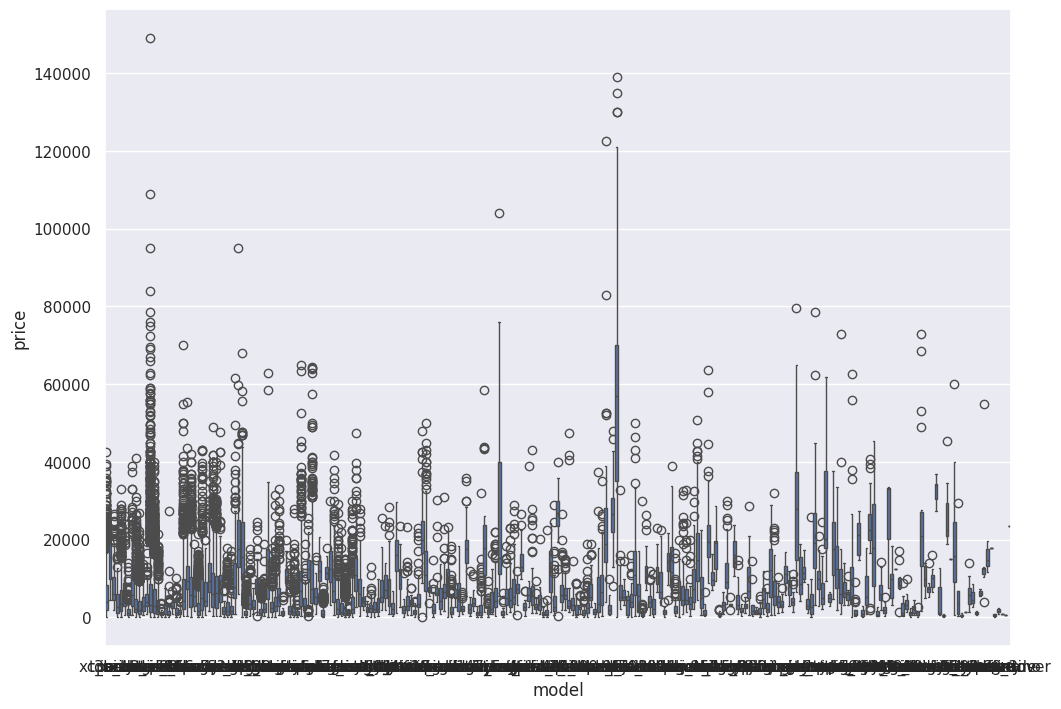

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()

col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col, axis=1)

# Remove duplicate entries
cars.drop_duplicates(keep='first', inplace=True)

cars = cars[
    (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]
cars = cars.copy()
cars['model'].value_counts()
pd.crosstab(cars['model'],columns='count',normalize=True)
sns.boxplot(x='model',y='price',data=cars)

kilometer
5000        479
10000       207
20000       651
30000       712
40000       795
50000       932
60000      1101
70000      1182
80000      1378
90000      1484
100000     1824
125000     4597
150000    27430
Name: count, dtype: int64
col_0         count
kilometer          
5000       0.011199
10000      0.004840
20000      0.015220
30000      0.016646
40000      0.018587
50000      0.021790
60000      0.025741
70000      0.027635
80000      0.032217
90000      0.034696
100000     0.042645
125000     0.107477
150000     0.641307


,kilometer
count,42772.000000
mean,125815.252969
std,39078.120302
min,5000.000000
25%,100000.000000
50%,150000.000000
75%,150000.000000
max,150000.000000


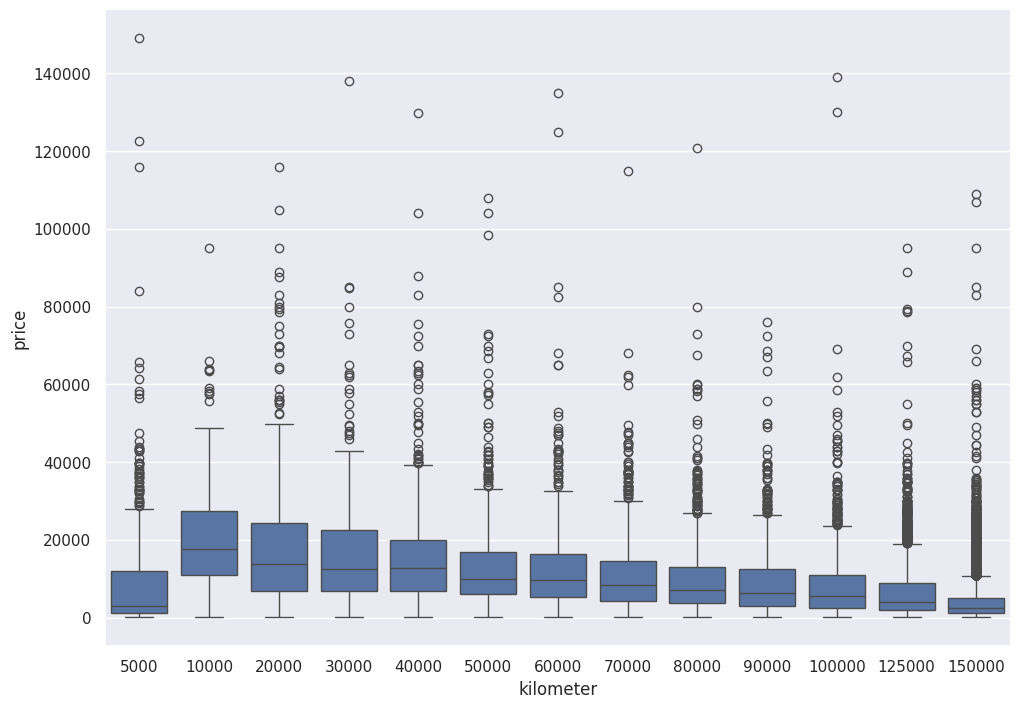

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()

col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col, axis=1)

# Remove duplicate entries
cars.drop_duplicates(keep='first', inplace=True)

cars = cars[
    (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]
cars = cars.copy()
v=cars['kilometer'].value_counts().sort_index()
print(v)
g=pd.crosstab(cars['kilometer'],columns='count',normalize=True)
print(g)
sns.boxplot(x='kilometer',y='price',data=cars)
cars['kilometer'].describe()
sns.regplot(x='kilometer',y='price',scatter=True,fit_reg=False,data=cars)

<Axes: xlabel='fuelType', ylabel='count'>

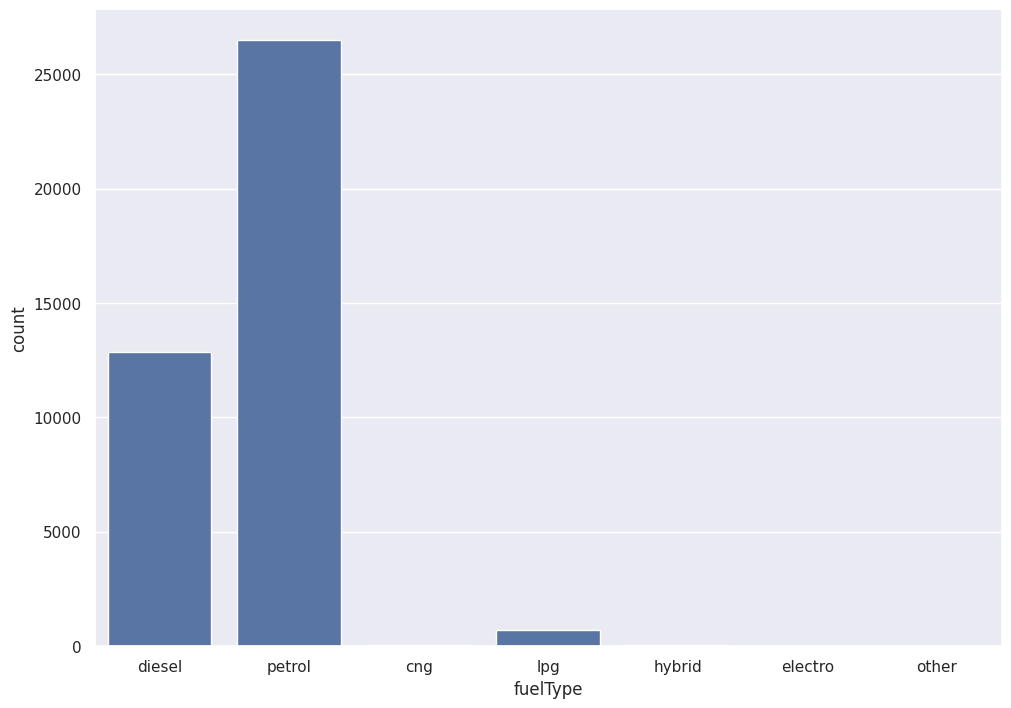

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()

col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col, axis=1)

# Remove duplicate entries
cars.drop_duplicates(keep='first', inplace=True)

cars = cars[
    (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]
cars = cars.copy()
cars['fuelType'].value_counts()
pd.crosstab(cars['fuelType'],columns='count',normalize=True)
sns.countplot(x='fuelType',data=cars)
#sns.boxplot(x='fuelType',y='price',data=cars)

<Axes: xlabel='fuelType', ylabel='price'>

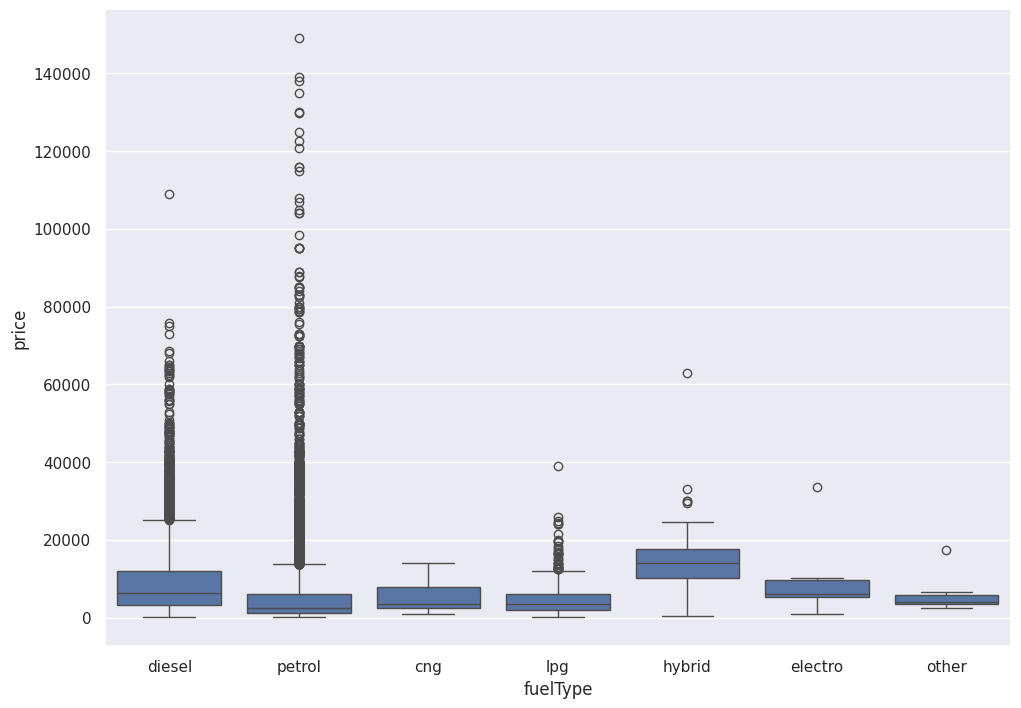

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()

col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col, axis=1)

# Remove duplicate entries
cars.drop_duplicates(keep='first', inplace=True)

cars = cars[
    (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]
cars = cars.copy()
cars['fuelType'].value_counts()
pd.crosstab(cars['fuelType'],columns='count',normalize=True)
#sns.countplot(x='fuelType',data=cars)
sns.boxplot(x='fuelType',y='price',data=cars)

brand
volkswagen        9134
bmw               4868
opel              4487
mercedes_benz     4134
audi              3984
ford              2815
renault           1941
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     299
kia                276
suzuki             264
porsche            260
alfa_romeo         245
chevrolet          213
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              56
rover               53
daewoo              53
trabant             43
lada                22
Name: count, dtype: int64


<Axes: xlabel='brand', ylabel='count'>

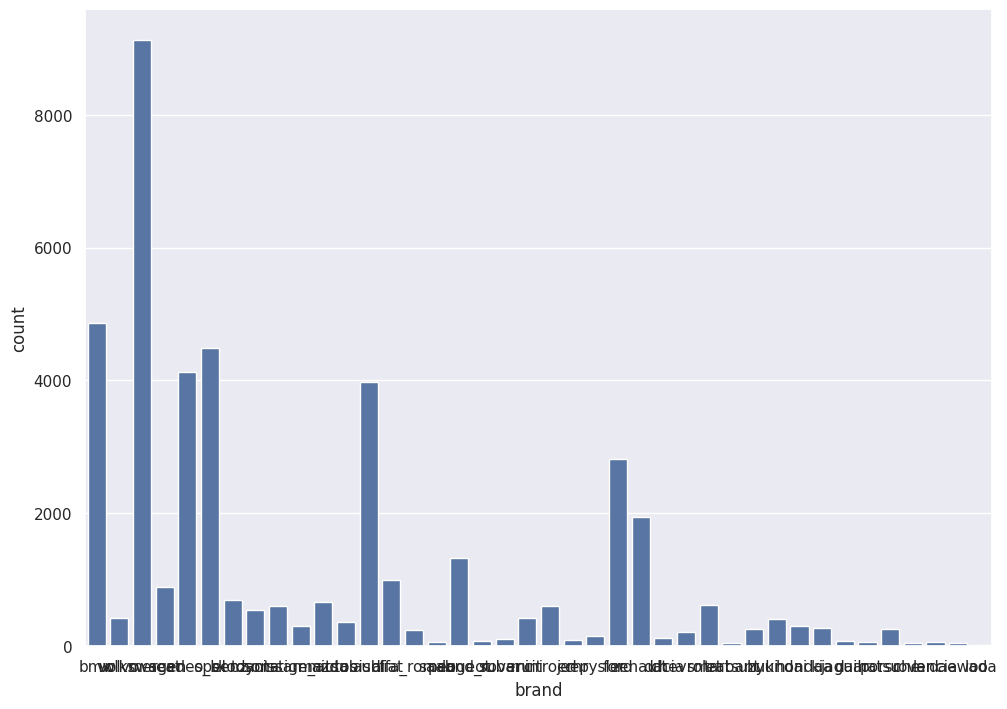

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()

col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col, axis=1)

# Remove duplicate entries
cars.drop_duplicates(keep='first', inplace=True)

cars = cars[
    (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]
cars = cars.copy()
print(cars['brand'].value_counts())
pd.crosstab(cars['brand'],columns='count',normalize=True)
sns.countplot(x='brand',data=cars)
#sns.boxplot(x='brand',y='price',data=cars)

notRepairedDamage
no     32507
yes     3988
Name: count, dtype: int64


<Axes: xlabel='notRepairedDamage', ylabel='count'>

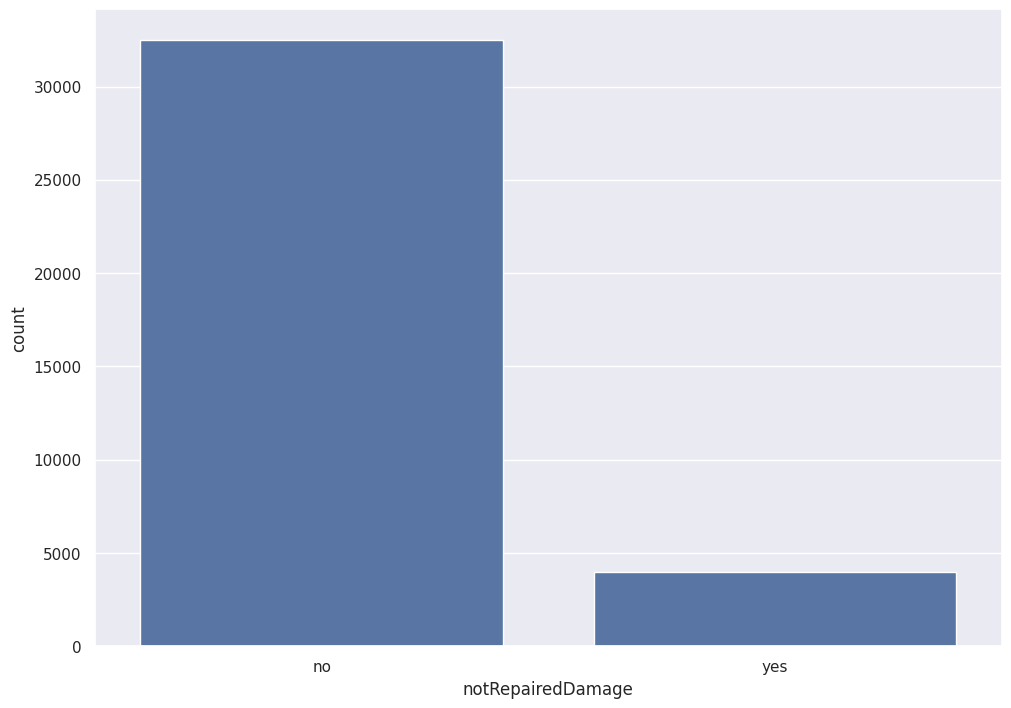

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()

col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col, axis=1)

# Remove duplicate entries
cars.drop_duplicates(keep='first', inplace=True)

cars = cars[
    (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]
cars = cars.copy()
print(cars['notRepairedDamage'].value_counts())
pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)
sns.countplot(x='notRepairedDamage',data=cars)
#sns.boxplot(x='fuelType',y='price',data=cars)

Final Feature Selection and Correlation Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()

col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col, axis=1)

# Remove duplicate entries
cars.drop_duplicates(keep='first', inplace=True)

cars = cars[
    (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]
cars = cars.copy()
# cars['notRepairedDamage'].value_counts()
# pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)
# #sns.countplot(x='notRepairedDamage',data=cars)
# sns.boxplot(x='notRepairedDamage',y='price',data=cars)
col = ['seller','offerType','abtest']
cars=cars.drop(columns=col,axis=1)
cars_copy = cars.copy()

cars_select1 = cars.select_dtypes(exclude=[object])
correlation = cars_select1.corr()
print(round(correlation,3))
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

                     price  yearOfRegistration  powerPS  kilometer  \
price                1.000               0.338    0.575     -0.440   
yearOfRegistration   0.338               1.000    0.153     -0.293   
powerPS              0.575               0.153    1.000     -0.016   
kilometer           -0.440              -0.293   -0.016      1.000   
monthOfRegistration  0.050               0.022    0.040     -0.019   

                     monthOfRegistration  
price                              0.050  
yearOfRegistration                 0.022  
powerPS                            0.040  
kilometer                         -0.019  
monthOfRegistration                1.000  


,price
powerPS,0.575234
kilometer,0.440138
yearOfRegistration,0.337912
monthOfRegistration,0.050239


Linear Regression Model – Training, Evaluation, and Diagnostics

(23018, 301) (9866, 301) (23018,) (9866,)
8.249615787653267
1.1274483657478247
0.5441533055897066
0.767057237980741 0.7809052978743883


,price
count,9866.000000
mean,0.003378
std,0.544170
min,-5.758544
25%,-0.257606
50%,0.040272
75%,0.296296
max,4.583640


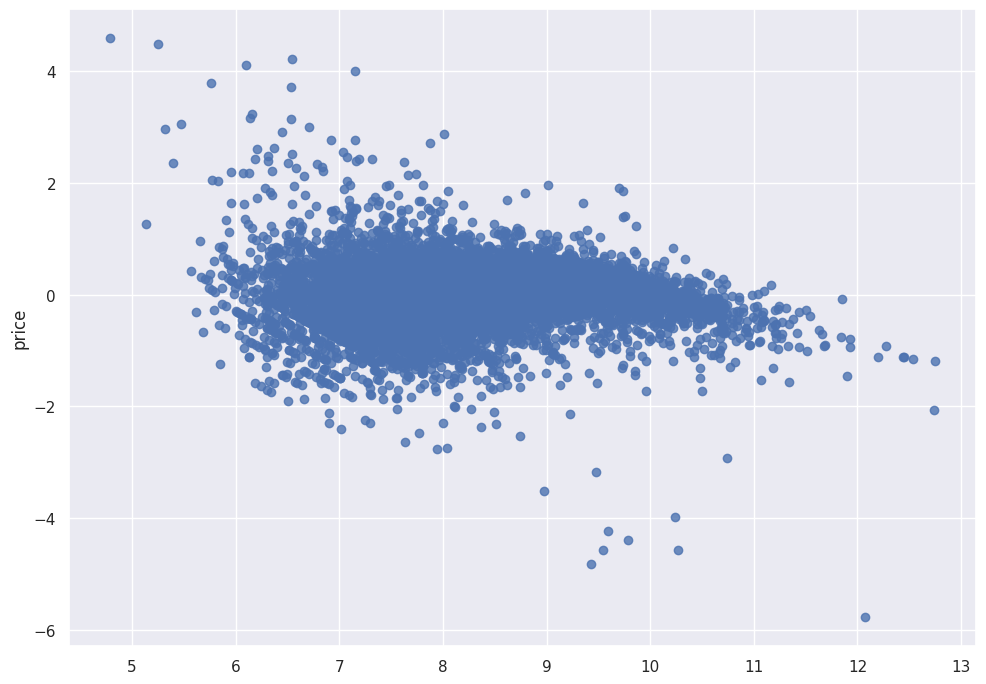

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set plot size for seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Load the dataset
cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()

# Drop irrelevant columns
col = ['name', 'dateCrawled', 'dateCreated', 'postalCode', 'lastSeen']
cars = cars.drop(columns=col, axis=1)

# Remove duplicates
cars.drop_duplicates(keep='first', inplace=True)

# Apply filtering conditions
cars = cars[
    (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]

# Drop unwanted columns after filtering
col = ['seller', 'offerType', 'abtest']
cars = cars.drop(columns=col, axis=1)

# Handle missing values (you can impute instead of dropping if needed)
cars_omit = cars.dropna(axis=0)
cars_omit = pd.get_dummies(cars_omit,drop_first=True)


x1 = cars_omit.drop(['price'],axis='columns',inplace=False)
y1 = cars_omit['price']

prices = pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})
#prices.hist()
# Apply log transformation to the target variable
y1 = np.log(cars_omit['price'])


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

base_pred = np.mean(y_test)
print(base_pred)
# repeating same value till length of test data
base_pred = np.repeat(base_pred,len(y_test))
# find rmse
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test,base_pred))

print(base_root_mean_square_error)
#===========================================================================================================
# LINEAR REGRESSION
#===================================================================================================
lgr = LinearRegression(fit_intercept=True)
#Model
model_lin1 = lgr.fit(X_train,y_train)

#predicting model on test set
cars_predictions_lin1 = lgr.predict(X_test)

#compute mse and rmse
lin_mse1 = mean_squared_error(y_test,cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)  # 0.54

# R squared value - this tells u how good is your model able to explain variablity in y
r2_lin_test1=model_lin1.score(X_test,y_test)
r2_lin_train1=model_lin1.score(X_train,y_train)
print(r2_lin_test1,r2_lin_train1)

# Regression diagnostics -Residual plot analysis this residual helps in difference b/w  test data and prediction i,e actual-predicted value
residuals1 = y_test - cars_predictions_lin1
sns.regplot(x=cars_predictions_lin1,y=residuals1,scatter=True,fit_reg=False)
residuals1.describe()




In [ ]:
pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 36.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


Random Forest Regressor and Missing Value Imputation

(23018, 301) (9866, 301) (23018,) (9866,)
8.249615787653267
1.1274483657478247
MSE: 0.18724076660049388
RMSE: 0.4327132614104794
0.8526985277045009 0.921359089682126
dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
lastSeen               0
dtype: int64


array([[<Axes: title={'center': '1. Before'}>,
        <Axes: title={'center': '2. After'}>]], dtype=object)

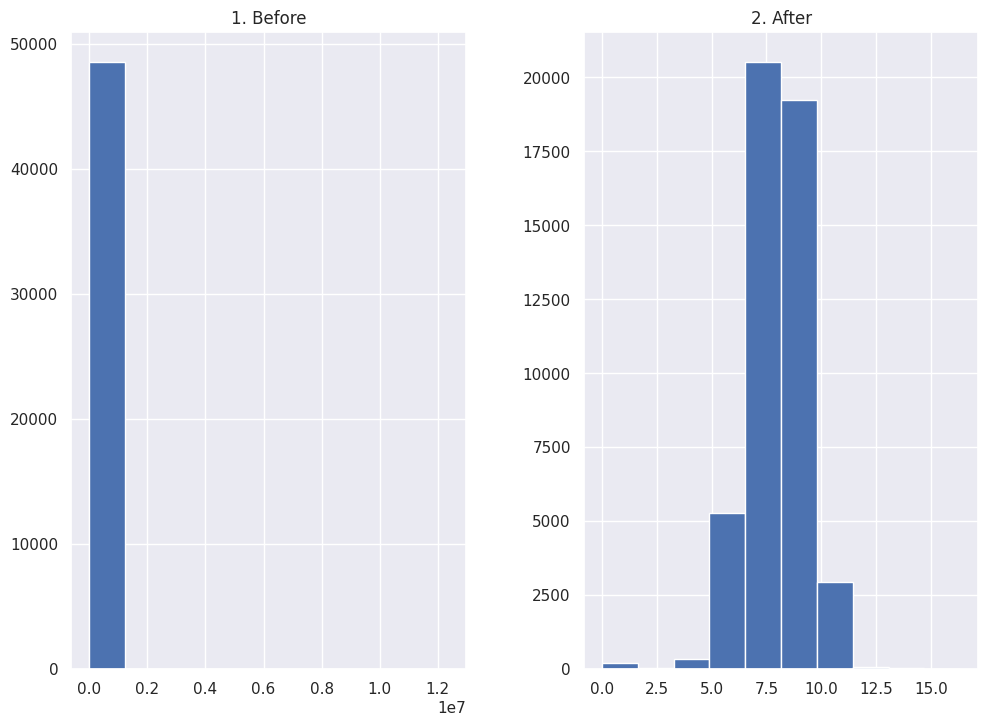

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set plot size for seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Load the dataset
cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()

# Drop irrelevant columns
col = ['name', 'dateCrawled', 'dateCreated', 'postalCode', 'lastSeen']
cars = cars.drop(columns=col, axis=1)

# Remove duplicates
cars.drop_duplicates(keep='first', inplace=True)

# Apply filtering conditions
cars = cars[
    (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]

# Drop unwanted columns after filtering
col = ['seller', 'offerType', 'abtest']
cars = cars.drop(columns=col, axis=1)

# Handle missing values (you can impute instead of dropping if needed)
cars_omit = cars.dropna(axis=0)
cars_omit = pd.get_dummies(cars_omit,drop_first=True)


x1 = cars_omit.drop(['price'],axis='columns',inplace=False)
y1 = cars_omit['price']

prices = pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})
#prices.hist()
# Apply log transformation to the target variable
y1 = np.log(cars_omit['price'])


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

base_pred = np.mean(y_test)
print(base_pred)
# repeating same value till length of test data
base_pred = np.repeat(base_pred,len(y_test))
# find rmse
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test,base_pred))

print(base_root_mean_square_error)
# random forest model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set plot size for seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Load the dataset
cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()

# this is for missing values


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=3)
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

base_pred = np.mean(y_test)
#print(base_pred)
# repeating same value till length of test data
base_pred = np.repeat(base_pred,len(y_test))
# find rmse
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test,base_pred))

#print(base_root_mean_square_error)
#===========================================================================================================
# LINEAR REGRESSION
#===================================================================================================
lgr = LinearRegression(fit_intercept=True)
#Model
model_lin1 = lgr.fit(X_train,y_train)

#predicting model on test set
cars_predictions_lin1 = lgr.predict(X_test)

#compute mse and rmse
lin_mse1 = mean_squared_error(y_test,cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
#print(lin_rmse1)  # 0.54

# R squared value - this tells u how good is your model able to explain variablity in y
r2_lin_test1=model_lin1.score(X_test,y_test)
r2_lin_train1=model_lin1.score(X_train,y_train)
#print(r2_lin_test1,r2_lin_train1)

# Regression diagnostics -Residual plot analysis this residual helps in difference b/w  test data and prediction i,e actual-predicted value
residuals1 = y_test - cars_predictions_lin1
#sns.regplot(x=cars_predictions_lin1,y=residuals1,scatter=True,fit_reg=False)


# random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    max_features=None,  # Use all features at each split
    max_depth=100,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=1
)
model_rf1 = rf.fit(X_train, y_train)
cars_prediction_rf1 = rf.predict(X_test)

from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
rf_mse1 = mean_squared_error(y_test, cars_prediction_rf1)
rf_rmse1 = np.sqrt(rf_mse1)

print("MSE:", rf_mse1)
print("RMSE:", rf_rmse1)

# rsquared value
r2_rf_test1=model_rf1.score(X_test,y_test)
r2_rf_train1 = model_rf1.score(X_train,y_train)
print(r2_rf_test1,r2_rf_train1)
#===================================================================================
#model building with imputed data

import matplotlib.pyplot as plt

# Assuming 'cars' is your DataFrame with missing values

# Impute missing values (median for numerical columns, most frequent for categorical)
cars_imputed = cars.apply(lambda x: x.fillna(x.median()) if x.dtype == 'float' else x.fillna(x.value_counts().index[0]))

# Check for remaining missing values
print(cars_imputed.isnull().sum())

# Convert categorical variables to dummy variables
cars_imputed = pd.get_dummies(cars_imputed, drop_first=True)

# Separate features (X) and target (y)
x2 = cars_imputed.drop(['price'], axis='columns', inplace=False)
y2 = cars_imputed['price']

y2 = y2[y2 > 0]

# Apply log transformation only to positive values
y2_log = np.log(y2)


# Create a DataFrame for before and after log transformation
prices = pd.DataFrame({"1. Before": y2, "2. After": y2_log})
prices.hist()





price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64


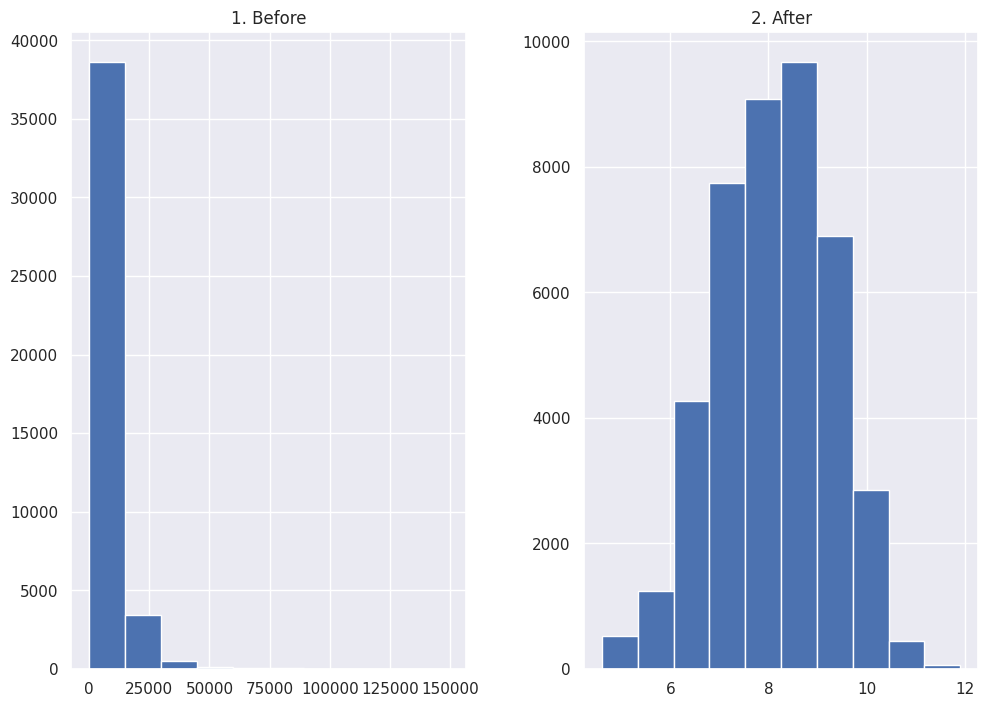

Linear Regression RMSE: 0.645786351121594
Random Forest RMSE: 0.4895146401590703
Linear Regression R-squared (test): 0.7047248345678804, (train): 0.7090200532450058
Random Forest R-squared (test): 0.8303395682668988, (train): 0.9041649926810741
Baseline Prediction (mean of y_test): 8.068391740519065
Baseline RMSE (log scale): 1.1884349112889792
Baseline RMSE (original scale): 3.2819406574508836
RMSE OF LINEAR REGRESSION 0.645786351121594
LINEAR REGRESSION R value : 0.7090200532450058 0.7047248345678804
Random forest of rmse:  0.4895146401590703
Random forest R value:: 0.8303395682668988 0.9041649926810741


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Set plot size for seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Load the dataset
cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()

# Drop irrelevant columns
col = ['name', 'dateCrawled', 'dateCreated', 'postalCode', 'lastSeen']
cars = cars.drop(columns=col, axis=1)

# Remove duplicates
cars.drop_duplicates(keep='first', inplace=True)

# Apply filtering conditions
cars = cars[
    (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]

# Drop unwanted columns after filtering
col = ['seller', 'offerType', 'abtest']
cars = cars.drop(columns=col, axis=1)

# Handle missing values (impute with median for numerical columns, most frequent for categorical columns)
cars_imputed = cars.apply(lambda x: x.fillna(x.median()) if x.dtype == 'float' else x.fillna(x.value_counts().index[0]))

# Check for missing values
print(cars_imputed.isnull().sum())

# Convert categorical variables to dummy variables (one-hot encoding)
cars_imputed = pd.get_dummies(cars_imputed, drop_first=True)

# Separate features (X) and target (y)
x2 = cars_imputed.drop(['price'], axis='columns', inplace=False)
y2 = cars_imputed['price']

# Filter out non-positive values (zero or negative)
y2 = y2[y2 > 0]

# Apply log transformation only to positive values
y2_log = np.log(y2)

# Create a DataFrame for before and after log transformation
prices = pd.DataFrame({"1. Before": y2, "2. After": y2_log})

# Plot histograms of both 'Before' and 'After' columns
prices.hist()

# Display the plot
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x2, y2_log, test_size=0.3, random_state=3)

# Linear Regression Model
lgr = LinearRegression(fit_intercept=True)
model_lin1 = lgr.fit(X_train, y_train)

# Predicting model on test set
cars_predictions_lin1 = lgr.predict(X_test)

# Compute MSE and RMSE for Linear Regression
lin_mse1 = mean_squared_error(y_test, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)

# R squared value - this tells you how well your model explains variability in y
r2_lin_test1 = model_lin1.score(X_test, y_test)
r2_lin_train1 = model_lin1.score(X_train, y_train)

# Random Forest Model
rf = RandomForestRegressor(
    n_estimators=100,
    max_features=None,  # Use all features at each split
    max_depth=100,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=1
)
model_rf1 = rf.fit(X_train, y_train)
cars_prediction_rf1 = rf.predict(X_test)



# Calculate MSE and RMSE for Random Forest
rf_mse1 = mean_squared_error(y_test, cars_prediction_rf1)
rf_rmse1 = np.sqrt(rf_mse1)

# Print MSE, RMSE, and R-squared for both models
print(f"Linear Regression RMSE: {lin_rmse1}")
print(f"Random Forest RMSE: {rf_rmse1}")
print(f"Linear Regression R-squared (test): {r2_lin_test1}, (train): {r2_lin_train1}")
print(f"Random Forest R-squared (test): {model_rf1.score(X_test, y_test)}, (train): {model_rf1.score(X_train, y_train)}")

#+=========================================== before is for missing for data

X_train, X_test, y_train, y_test = train_test_split(x2, y2_log, test_size=0.3, random_state=3)

# Baseline Model: Predicting the mean of the log-transformed target
base_pred = np.mean(y_test)  # Mean of log-transformed y_test
print(f"Baseline Prediction (mean of y_test): {base_pred}")

# Repeat the baseline prediction for all test samples
base_pred = np.repeat(base_pred, len(y_test))

# Calculate baseline RMSE on the log scale
base_rmse_log = np.sqrt(mean_squared_error(y_test, base_pred))
print(f"Baseline RMSE (log scale): {base_rmse_log}")

# If you want to interpret the RMSE on the original scale:
# Transform the log RMSE back to the original scale (exponentiation)
base_rmse_original = np.exp(base_rmse_log)
print(f"Baseline RMSE (original scale): {base_rmse_original}")


######### CORRECT PLOT

#

#==========================================================================
# LINEAR REGRESSION  with imputted data
#==================================================================
lgr2 = LinearRegression(fit_intercept=True)
model_lin2 = lgr2.fit(X_train,y_train)
cars_predictions_lin2 = lgr2.predict(X_test)

lin_mse2 = mean_squared_error(y_test,cars_predictions_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
print("RMSE OF LINEAR REGRESSION",lin_rmse2)
# R value
r2_lin_train2 = model_lin2.score(X_test,y_test)
r2_lin_test2 = model_lin2.score(X_train,y_train)
print("LINEAR REGRESSION R value :",r2_lin_test2,r2_lin_train2)

#===================================================================
#RANDOM FORREST WITH IMPUTTED DATA
#=====================================================================

rf2 = RandomForestRegressor(
    n_estimators=100,
    max_features=None,  # Use all features at each split
    max_depth=100,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=1
)
model_rf2 = rf2.fit(X_train,y_train)
cars_predictions_rf2 = rf2.predict(X_test)
rf_mse2 = mean_squared_error(y_test,cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
print("Random forest of rmse: ",rf_rmse2)

#R squared value
r2_rf_test2=model_rf2.score(X_test,y_test)
r2_rf_train2=model_rf2.score(X_train,y_train)
print("Random forest R value::",r2_rf_test2,r2_rf_train2)

# note lower rmse indicates that model's predictions are closer to the actual values, meaning it has a better fit to the data.
# on comaparision  random forest IS BETTER THAN LINEAR REGRESSION
#HIGH R2 INDICATES THAT MODEL IS WORKIMG WELL.





# The prices.hist() function is used to plot histograms of the columns in the prices DataFrame. Each column in the DataFrame ("1. Before" and "2. After") is represented by its own histogram, as seen in the two plots you shared.

# What does a histogram show?
# A histogram visualizes the distribution of data by grouping the values into intervals (or "bins") and plotting the frequency (count) of data points in each bin.

# X-axis: Represents the range of values in the column (e.g., original prices or log-transformed prices).
# Y-axis: Represents the number of occurrences (frequency) of values falling within each bin.
# What is prices.hist showing?
# The left plot ("1. Before"):

# Displays the distribution of the original price values (y2).
# The data appears to be highly skewed, with most values concentrated near smaller prices, and very few at the higher end.
# The right plot ("2. After"):

# Displays the distribution of the log-transformed price values (y2_log).
# The transformation has compressed the scale, making the distribution more balanced and closer to normal (bell-shaped).
# Why use prices.hist?
# To compare the original distribution and the transformed distribution side by side.
# To confirm that the log transformation has reduced skewness and helped in normalizing the data.
# To understand how the transformation affects the spread of the data, which is important for model performance.

Linear vs Random Forest with Imputed Data

Missing value imputation

Train/test split

Model building (Linear Regression + Random Forest)

Baseline RMSE comparison

Histograms for log transformation

Evaluation metrics (RMSE + R²)

Conclusion and model comparison